In [125]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import copy 

import numpy as np 

import multiprocessing
from multiprocessing import Pool
from contextlib import closing

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.gridspec import GridSpec

# Put the fit_sersic.py, parameters.py, and priors.py files in the same folder
from fit_sersic import Sersic, display_model_1d
from fit_sersic import config_params, prof_curvefit, update_params 
from fit_sersic import emcee_fit_one_sersic, ln_probability, visual_emcee

# Install emcee sampling tool: `pip install --upgrade emcee`
# To visualize the result, also need `corner`: `pip install --upgrade corner`
rcParams.update({'font.size': 25})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
import corner

In [127]:
from astropy.modeling import models, fitting
import matplotlib.colors as colors
import matplotlib.cm as cmx
from pylab import figure, text, scatter, show
from math import factorial
import h5py

In [128]:
all_profs = np.load('/Users/RAJ/2019_paper/paper_figures/fitting_files/summary_median.npy')

rad_kpc = all_profs['rad_kpc']

In [129]:
# n_walker should at least > n_dim ** 2
n_walkers = 128
n_burnin, n_samples = 2000, 500

# You might want to take advantage of the multiple processors you have
n_jobs = multiprocessing.cpu_count()

In [130]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_1_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_1_prof_ins'], all_profs['bin_1_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_1_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_1_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 2.99484641 86.48443493 11.08635145]
Error of Sersic parameters from curvefit: [ 0.18310359 10.0738146   0.63477254]
# Running burn-in step...


100%|██████████| 2000/2000 [04:07<00:00,  8.07it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.021437500000000005
#------------------------------------------------------
#  Best ln(Probability):   -17.06265
[ 2.98804947 86.46975602 11.0921717 ]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.03888141 89.42613007 10.96081475]
#------------------------------------------------------
(3.0013297140312067, 0.2606142624978607, 0.2556445359640729)
(87.55622427483735, 15.01738608946195, 13.873933219613903)
(11.05179779985531, 1.046632042507996, 0.860827385551012)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:24<00:00,  2.45it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.384453125
#------------------------------------------------------
#  Best ln(Probability):   -17.06178
[ 2.99521939 86.89989052 11.06907627]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.06107474 89.97012853 10.91612303]
#------------------------------------------------------
(3.0395280248619354, 0.22983521780589378, 0.20087093812891643)
(88.61465192701795, 12.813878200601522, 10.489072948770698)
(10.94297276879878, 0.6904403941684176, 0.7202509929755045)
#------------------------------------------------------


In [131]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_2_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_2_prof_ins'], all_profs['bin_2_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_2_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_2_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 3.3944366  46.56213763 12.89266885]
Error of Sersic parameters from curvefit: [0.15103995 4.7367548  0.57659675]
# Running burn-in step...


100%|██████████| 2000/2000 [04:14<00:00,  7.86it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.030632812500000002
#------------------------------------------------------
#  Best ln(Probability):   -12.14121
[ 3.39856749 46.33622621 12.91652982]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.45537954 48.70398589 12.7447081 ]
#------------------------------------------------------
(3.4331495635704123, 0.3052208417978499, 0.28009926051851375)
(47.496271603158505, 10.017258393103198, 8.606438954575673)
(12.794117819898142, 1.1852203234355159, 1.0491840300692115)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [02:55<00:00,  2.85it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.35259375000000004
#------------------------------------------------------
#  Best ln(Probability):   -12.13841
[ 3.39605786 46.77469748 12.87324368]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.46843419 48.67922549 12.73564925]
#------------------------------------------------------
(3.4499453988049975, 0.29776009013678983, 0.2776959940167725)
(47.98555439938905, 9.69110612263124, 8.325395605456855)
(12.703307062501642, 1.1215374796648039, 0.9990062600630711)
#------------------------------------------------------


In [132]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_3_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_3_prof_ins'], all_profs['bin_3_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_3_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_3_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 4.3159477  35.64453786 13.44427409]
Error of Sersic parameters from curvefit: [0.41504766 8.45644606 1.41655944]
# Running burn-in step...


100%|██████████| 2000/2000 [04:25<00:00,  7.55it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.01799609375
#------------------------------------------------------
#  Best ln(Probability):   -16.62616
[ 4.31982297 35.64551414 13.43911562]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.68150584 43.92409255 12.59107543]
#------------------------------------------------------
(4.459043255482748, 0.76320812944748, 0.6342418543305293)
(38.14778164095028, 17.504040216474607, 12.20757361411182)
(13.072092974187328, 2.529543885075121, 2.0825886868524393)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [04:21<00:00,  1.91it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.27546875
#------------------------------------------------------
#  Best ln(Probability):   -16.62695
[ 4.33257517 35.96306516 13.39243256]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.60428302 41.12596386 12.93457281]
#------------------------------------------------------
(4.549670322462431, 0.6435496469767221, 0.5428178954565963)
(39.46879783494047, 14.675358665883742, 10.442489273847897)
(12.796091474294078, 1.835843055505899, 1.7297222649470143)
#------------------------------------------------------


In [133]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_4_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_4_prof_ins'], all_profs['bin_4_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_4_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_4_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 3.08502236 19.82575383 17.8928843 ]
Error of Sersic parameters from curvefit: [0.16728383 1.11454333 0.50846095]
# Running burn-in step...


100%|██████████| 2000/2000 [10:48<00:00,  3.09it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.16162109375
#------------------------------------------------------
#  Best ln(Probability):   -10.29740
[ 3.07960859 19.80729518 17.90715443]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.16767008 20.06987671 17.76949431]
#------------------------------------------------------
(3.1452706582623637, 0.3158814066959166, 0.2688597517512079)
(19.988548250703982, 2.063576852773025, 1.855446666925534)
(17.774565594177698, 0.8788125449103106, 0.8821745171923183)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:37<00:00,  2.30it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.39506250000000004
#------------------------------------------------------
#  Best ln(Probability):   -10.29876
[ 3.07678047 19.77083906 17.92977923]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.15889687 20.06666028 17.77438837]
#------------------------------------------------------
(3.1605077863802142, 0.3226501214416402, 0.2875410266558456)
(20.049504500230366, 2.075120197085699, 1.8962177626778356)
(17.731232627085554, 0.8913398148746516, 0.8776060398791081)
#------------------------------------------------------


In [134]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_5_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_5_prof_ins'], all_profs['bin_5_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_5_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_5_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 6.08367369 22.60347884 15.25495848]
Error of Sersic parameters from curvefit: [0.63763661 3.60090297 1.18769408]
# Running burn-in step...


100%|██████████| 2000/2000 [05:15<00:00,  6.33it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.0348359375
#------------------------------------------------------
#  Best ln(Probability):   -13.14396
[ 6.06622233 22.26123775 15.35098755]
#------------------------------------------------------
#  Best parameters (mean):
[ 6.73211932 25.1423104  14.83920068]
#------------------------------------------------------
(6.579734033477166, 1.4445228685737348, 1.3015662956326404)
(23.658254961726364, 8.916511494814642, 7.286073771460934)
(14.830440106470578, 2.8364801709139247, 2.1248873014534535)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [02:58<00:00,  2.80it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.299140625
#------------------------------------------------------
#  Best ln(Probability):   -13.14404
[ 6.16637638 22.84825434 15.15375556]
#------------------------------------------------------
#  Best parameters (mean):
[ 6.58674279 25.6986573  14.71560599]
#------------------------------------------------------
(6.648859846255393, 1.396609861116774, 1.2163421745065435)
(24.34312510427567, 8.281845697619843, 6.385529622110369)
(14.639843303287293, 2.2708038103607144, 1.945331985801019)
#------------------------------------------------------


In [135]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_1_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_1_prof_exs'], all_profs['bin_1_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_1_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_1_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 4.67200279 43.93139204 12.19812063]
Error of Sersic parameters from curvefit: [0.18636989 3.32703795 0.4448177 ]
# Running burn-in step...


100%|██████████| 2000/2000 [04:31<00:00,  7.35it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.039859375
#------------------------------------------------------
#  Best ln(Probability):   -10.34232
[ 4.67033401 43.79179591 12.21008158]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.75049879 45.11323624 12.11706857]
#------------------------------------------------------
(4.725845763383878, 0.42537139558768633, 0.4229490854958211)
(44.697679172311375, 7.655492179364856, 7.371960113876689)
(12.08967151611945, 1.1063575271787744, 0.8775992090523701)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [02:59<00:00,  2.79it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.350375
#------------------------------------------------------
#  Best ln(Probability):   -10.34176
[ 4.67701864 44.0018805  12.19146135]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.74310052 45.00611669 12.14258554]
#------------------------------------------------------
(4.752503485950844, 0.416126126684925, 0.4167949021990802)
(45.224077084790174, 7.661429945029646, 7.104273678670573)
(12.015034634814713, 1.0275293079393215, 0.8682180012676302)
#------------------------------------------------------


In [136]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_2_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_2_prof_exs'], all_profs['bin_2_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_2_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_2_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 5.54267755 23.113129   15.10800476]
Error of Sersic parameters from curvefit: [0.20098758 1.12865609 0.36395063]
# Running burn-in step...


100%|██████████| 2000/2000 [06:31<00:00,  5.11it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.10876953125000001
#------------------------------------------------------
#  Best ln(Probability):    -8.30850
[ 5.52448271 23.1028965  15.11600106]
#------------------------------------------------------
#  Best parameters (mean):
[ 5.6146262  23.44827898 15.0535252 ]
#------------------------------------------------------
(5.6043983153663, 0.4918418017646413, 0.4967530261242832)
(23.27385293720562, 2.951844410490402, 2.8433828574675033)
(15.052676036884709, 0.9869637976015859, 0.8404341944508182)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [04:09<00:00,  2.00it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.35503125
#------------------------------------------------------
#  Best ln(Probability):    -8.30825
[ 5.54514618 23.21420937 15.08023283]
#------------------------------------------------------
#  Best parameters (mean):
[ 5.62716454 23.44118388 15.06622352]
#------------------------------------------------------
(5.598259048929499, 0.522062969639217, 0.4966030043145464)
(23.232809669868345, 2.986832558882721, 2.8157668640668945)
(15.05538161699009, 0.9723557741483724, 0.8410917665486952)
#------------------------------------------------------


In [137]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_3_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_3_prof_exs'], all_profs['bin_3_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_3_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_3_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 4.46919852 28.2844173  14.51679728]
Error of Sersic parameters from curvefit: [0.28512017 2.84221771 0.70431498]
# Running burn-in step...


100%|██████████| 2000/2000 [06:34<00:00,  5.06it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.05299218750000001
#------------------------------------------------------
#  Best ln(Probability):   -12.04479
[ 4.50013994 28.60209248 14.43732154]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.6978453  30.56432336 14.09250726]
#------------------------------------------------------
(4.613476912716645, 0.55343066623157, 0.5059684217862044)
(29.5391061023468, 6.191146620200435, 5.0403745369150705)
(14.203749718520873, 1.3405039870540474, 1.2705289353146298)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:45<00:00,  2.21it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.33999999999999997
#------------------------------------------------------
#  Best ln(Probability):   -12.04357
[ 4.47498981 28.27212691 14.51842736]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.6700968  30.31601308 14.15435219]
#------------------------------------------------------
(4.626113175811202, 0.542186210017654, 0.48283748493204826)
(29.654292656416068, 6.057351212594199, 4.831187567713158)
(14.156777041551942, 1.2788312171901222, 1.2233286629769413)
#------------------------------------------------------


In [138]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_4_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_4_prof_exs'], all_profs['bin_4_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_4_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_4_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 5.41884398 14.61271873 18.49973002]
Error of Sersic parameters from curvefit: [0.24217253 0.69991849 0.43481461]
# Running burn-in step...


100%|██████████| 2000/2000 [10:15<00:00,  3.25it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.1761015625
#------------------------------------------------------
#  Best ln(Probability):    -8.54209
[ 5.42291117 14.63802407 18.4893845 ]
#------------------------------------------------------
#  Best parameters (mean):
[ 5.53092927 14.77457752 18.43577242]
#------------------------------------------------------
(5.511138177239667, 0.5346069101410995, 0.5009664310356143)
(14.78210899822407, 1.6901366244070548, 1.5441746556880585)
(18.37807016004258, 1.0186441436960436, 0.9481156224782445)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:27<00:00,  2.41it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.36707812500000003
#------------------------------------------------------
#  Best ln(Probability):    -8.54317
[ 5.42900328 14.65188503 18.46718338]
#------------------------------------------------------
#  Best parameters (mean):
[ 5.59016024 14.86964601 18.38496101]
#------------------------------------------------------
(5.535541249439796, 0.5710211428162673, 0.5244786943849471)
(14.765606403850505, 1.691908418732499, 1.593530356014833)
(18.376160961008523, 1.08135002818711, 0.9667530761931467)
#------------------------------------------------------


In [139]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_5_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_5_prof_exs'], all_profs['bin_5_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_5_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_5_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 5.94080606  7.26964328 24.27781091]
Error of Sersic parameters from curvefit: [0.7014889  0.71145782 1.10089104]
# Running burn-in step...


100%|██████████| 2000/2000 [06:16<00:00,  5.31it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.08501171875
#------------------------------------------------------
#  Best ln(Probability):    -9.92870
[ 6.91180875  4.84387964 29.33368105]
#------------------------------------------------------
#  Best parameters (mean):
[ 6.84946376  5.91714064 27.22542606]
#------------------------------------------------------
(6.875583315306531, 1.5966625464630448, 1.6700758388986392)
(5.5740944178804215, 1.8204279344542948, 1.2773960379687654)
(27.557234793237114, 3.596771330076912, 3.648549245883096)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [02:43<00:00,  3.06it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.3254999999999999
#------------------------------------------------------
#  Best ln(Probability):    -9.92948
[ 6.93102286  4.81979927 29.37501012]
#------------------------------------------------------
#  Best parameters (mean):
[ 6.94023594  5.76412476 27.52300703]
#------------------------------------------------------
(6.895346790436615, 1.5921050586253775, 1.6709416609224794)
(5.540240222112885, 1.7654452935381961, 1.2279055649897845)
(27.503390368344053, 3.5680199138081683, 3.4715815355281414)
#------------------------------------------------------


In [144]:
colors = plt.cm.plasma(np.linspace(0,1,10))

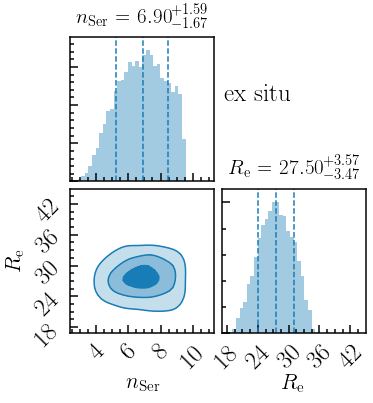

In [185]:
bin1_ins_n_re = bin_5_exs['samples'][:, [0,2]]
ORG = plt.get_cmap('PuBu')
params_label = [r'$n_{\rm Ser}$', r'$R_{\rm e}$']

# To get the correct ranges for the plot, you need to combine all the samples you want to
# plot
all_samples = np.vstack([bin1_ins_n_re])

# Get the min and max ranges for Sersic index and Re
min_ranges = np.nanmin(all_samples, axis=0)
max_ranges = np.nanmax(all_samples, axis=0)

# X-Y ranges of the corner plot
corner_ranges = [(min_ranges[0] * 0.9, max_ranges[0] * 1.2), 
                 (min_ranges[1] * 0.9, max_ranges[1] * 1.2)]

fig_bin1 = corner.corner(
        bin1_ins_n_re,
        bins=40, color=ORG(0.7),
        range=corner_ranges,
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 22},
        quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=True,
        title_kwargs={"fontsize": 21},
        hist_kwargs={"histtype": 'stepfilled', "alpha": 0.4,
                     "edgecolor": "none", "density": False},
        use_math_text=True,
        **{'title_fmt': '.2f', 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )
for ax in fig_bin1.get_axes():
    ax.tick_params(axis='both', labelsize=16)
    text(1.3, 0.60,r'\rm ex situ',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax.transAxes)
    break



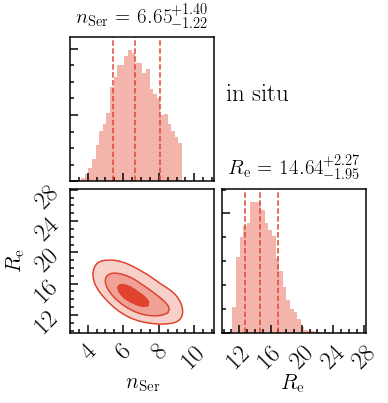

In [178]:
bin1_ins_n_re = bin_5_ins['samples'][:, [0,2]]
ORG = plt.get_cmap('OrRd')
params_label = [r'$n_{\rm Ser}$', r'$R_{\rm e}$']

# To get the correct ranges for the plot, you need to combine all the samples you want to
# plot
all_samples = np.vstack([bin1_ins_n_re])

# Get the min and max ranges for Sersic index and Re
min_ranges = np.nanmin(all_samples, axis=0)
max_ranges = np.nanmax(all_samples, axis=0)

# X-Y ranges of the corner plot
corner_ranges = [(min_ranges[0] * 0.9, max_ranges[0] * 1.2), 
                 (min_ranges[1] * 0.9, max_ranges[1] * 1.2)]

fig_bin1 = corner.corner(
        bin1_ins_n_re,
        bins=40, color=ORG(0.7),
        range=corner_ranges,
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 22},
        quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=True,
        title_kwargs={"fontsize": 21},
        hist_kwargs={"histtype": 'stepfilled', "alpha": 0.4,
                     "edgecolor": "none", "density": False},
        use_math_text=True,
        **{'title_fmt': '.2f', 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )
for ax in fig_bin1.get_axes():
    ax.tick_params(axis='both', labelsize=16)
    text(1.3, 0.60,r'\rm in situ',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax.transAxes)
    break






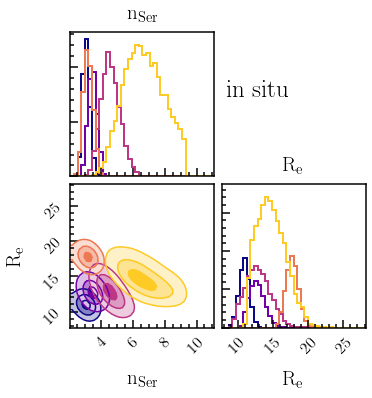

In [157]:
# Only plot the Sersic index and Re
bin1_ins_n_re = bin_1_ins['samples'][:, [0,2]]
bin2_ins_n_re = bin_2_ins['samples'][:, [0,2]]
bin3_ins_n_re = bin_3_ins['samples'][:, [0,2]]
bin4_ins_n_re = bin_4_ins['samples'][:, [0,2]]
bin5_ins_n_re = bin_5_ins['samples'][:, [0,2]]
params_label = [r'$ \rm n_{\rm Ser}$', r'$ \rm R_{\rm e}$']

all_samples = np.vstack([bin1_ins_n_re, bin2_ins_n_re,bin3_ins_n_re,bin4_ins_n_re,bin5_ins_n_re])

# Get the min and max ranges for Sersic index and Re
min_ranges = np.nanmin(all_samples, axis=0)
max_ranges = np.nanmax(all_samples, axis=0)

# X-Y ranges of the corner plot
corner_ranges = [(min_ranges[0] * 0.9, max_ranges[0] * 1.2), 
                 (min_ranges[1] * 0.9, max_ranges[1] * 1.2)]



# Also need to adjust the weight
ns_hist_1, _ = np.histogram(bin1_ins_n_re[:, 0], bins=40) 
ns_hist_2, _ = np.histogram(bin2_ins_n_re[:, 0], bins=40) 
ns_hist_3, _ = np.histogram(bin3_ins_n_re[:, 0], bins=40) 
ns_hist_4, _ = np.histogram(bin4_ins_n_re[:, 0], bins=40) 
ns_hist_5, _ = np.histogram(bin5_ins_n_re[:, 0], bins=40) 
re_hist_1, _ = np.histogram(bin1_ins_n_re[:, 1], bins=40) 
re_hist_2, _ = np.histogram(bin2_ins_n_re[:, 1], bins=40)
re_hist_3, _ = np.histogram(bin3_ins_n_re[:, 1], bins=40)
re_hist_4, _ = np.histogram(bin4_ins_n_re[:, 1], bins=40)
re_hist_5, _ = np.histogram(bin5_ins_n_re[:, 1], bins=40)

hist_weight = np.sum([np.max(re_hist_1),np.max(re_hist_2),np.max(re_hist_3),np.max(re_hist_4),np.max(re_hist_5)])
all_samples_ns = np.vstack([ns_hist_1,ns_hist_2,ns_hist_3,ns_hist_4,ns_hist_5])
all_samples_re = np.vstack([re_hist_1,re_hist_2,re_hist_3,re_hist_4,re_hist_5])

#setting the hist_weights
max_n = np.max(all_samples_ns)
max_re = np.max(all_samples_re)


# Colors for in-situ and ex-situ
ORG = plt.get_cmap('OrRd')



fig_bin1 = corner.corner(
        bin1_ins_n_re,
        bins=40, color=colors[0],
        range=corner_ranges,
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=True,
        title_fmt=None,
        verbose = False,
        title_kwargs={"fontsize": 21},
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[0],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re)) * 1.0,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin2_ins_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[2],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[2],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re)) * 1.01,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin3_ins_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[4],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[4],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re)) * 2.2,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin4_ins_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[6],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[6],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re))* 1.27 ,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin5_ins_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[8],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0, 
                     "edgecolor": colors[8], "linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re)) *5.5 ,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

for ax in fig_bin1.get_axes():
    ax.tick_params(axis='both', labelsize=16)


for ax in fig_bin1.get_axes():
    ax.tick_params(axis='both', labelsize=16)
    text(1.3, 0.60,r'\rm in situ',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax.transAxes)
    break


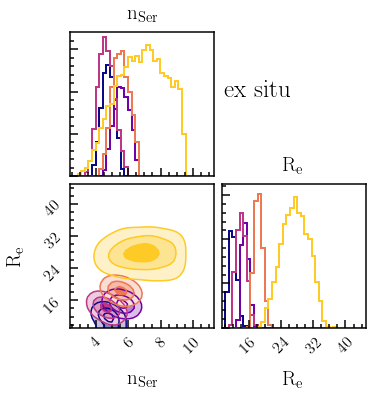

In [167]:
# Only plot the Sersic index and Re
bin1_exs_n_re = bin_1_exs['samples'][:, [0,2]]
bin2_exs_n_re = bin_2_exs['samples'][:, [0,2]]
bin3_exs_n_re = bin_3_exs['samples'][:, [0,2]]
bin4_exs_n_re = bin_4_exs['samples'][:, [0,2]]
bin5_exs_n_re = bin_5_exs['samples'][:, [0,2]]
params_label = [r'$ \rm n_{\rm Ser}$', r'$ \rm R_{\rm e}$']

all_samples = np.vstack([bin1_exs_n_re, bin2_exs_n_re,bin3_exs_n_re,bin4_exs_n_re,bin5_exs_n_re])

# Get the min and max ranges for Sersic index and Re
min_ranges = np.nanmin(all_samples, axis=0)
max_ranges = np.nanmax(all_samples, axis=0)

# X-Y ranges of the corner plot
corner_ranges = [(min_ranges[0] * 0.9, max_ranges[0] * 1.2), 
                 (min_ranges[1] * 0.9, max_ranges[1] * 1.2)]

# Also need to adjust the weight
ns_hist_1, _ = np.histogram(bin1_exs_n_re[:, 0], bins=40) 
ns_hist_2, _ = np.histogram(bin2_exs_n_re[:, 0], bins=40) 
ns_hist_3, _ = np.histogram(bin3_exs_n_re[:, 0], bins=40) 
ns_hist_4, _ = np.histogram(bin4_exs_n_re[:, 0], bins=40) 
ns_hist_5, _ = np.histogram(bin5_exs_n_re[:, 0], bins=40) 
re_hist_1, _ = np.histogram(bin1_exs_n_re[:, 1], bins=40) 
re_hist_2, _ = np.histogram(bin2_exs_n_re[:, 1], bins=40)
re_hist_3, _ = np.histogram(bin3_exs_n_re[:, 1], bins=40)
re_hist_4, _ = np.histogram(bin4_exs_n_re[:, 1], bins=40)
re_hist_5, _ = np.histogram(bin5_exs_n_re[:, 1], bins=40)

#setting the hist_weights
all_samples_ns = np.vstack([ns_hist_1,ns_hist_2,ns_hist_3,ns_hist_4,ns_hist_5])
all_samples_re = np.vstack([re_hist_1,re_hist_2,re_hist_3,re_hist_4,re_hist_5])
max_n = np.max(all_samples_ns)
max_re = np.max(all_samples_re)

hist_weight = np.sum([np.max(re_hist_1),np.max(re_hist_2),np.max(re_hist_3),np.max(re_hist_4),np.max(re_hist_5)])


# Colors for in-situ and ex-situ
ORG = plt.get_cmap('OrRd')



fig_bin1 = corner.corner(
        bin1_exs_n_re,
        bins=40, color=colors[0],
        range=corner_ranges,
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=True,
        title_fmt=None,
        verbose = False,
        title_kwargs={"fontsize": 21},
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[0],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re)) * 1.0,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin2_exs_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[2],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[2],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re)) * 1.01,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin3_exs_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[4],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[4],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re)) * 1.5,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin4_exs_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[6],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[6],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re))* 1.5 ,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin5_exs_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[8],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0, 
                     "edgecolor": colors[8], "linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re)) *4.5 ,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

for ax in fig_bin1.get_axes():
    ax.tick_params(axis='both', labelsize=16)


for ax in fig_bin1.get_axes():
    ax.tick_params(axis='both', labelsize=16)
    text(1.3, 0.60,r'\rm ex situ',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax.transAxes)
    break


# Saving the files

In [192]:
bin_1_exs.keys()

dict_keys(['samples', 'lnprob', 'best', 'mean', 'chains', 'position', 'acceptance', 'best_curvefit', 'cov_curvefit', 'err_curvefit', 'prof_norm', 'err_norm'])

In [203]:
#in_5_exs['chains']

In [204]:
bin_5_exs['prof_norm']

array([1.16574502e+03, 6.66192897e+01, 2.18341616e+01, 1.05633910e+01,
       5.98874134e+00, 3.88872747e+00, 2.65525872e+00, 1.93740660e+00,
       1.46137519e+00, 1.11624184e+00, 8.83758163e-01, 7.12730581e-01,
       6.16129256e-01, 5.12670914e-01, 4.40458400e-01, 3.73247864e-01,
       3.22109527e-01, 2.75285894e-01, 2.35813709e-01, 2.01112751e-01,
       1.76742431e-01, 1.57214244e-01, 1.40755879e-01, 1.26507889e-01,
       1.13020446e-01, 1.03158101e-01, 9.39303862e-02, 8.65839974e-02,
       7.94457850e-02, 7.31070619e-02, 6.64254305e-02, 6.12251756e-02,
       5.61878962e-02, 5.20931165e-02, 4.86706395e-02, 4.51829271e-02,
       4.19935696e-02, 3.88290115e-02, 3.57044782e-02, 3.39603415e-02,
       3.21404236e-02, 3.02998193e-02, 2.83854628e-02, 2.64617971e-02,
       2.44724943e-02, 2.29461217e-02, 2.15205380e-02, 2.00977573e-02,
       1.87288289e-02, 1.75340202e-02, 1.63539498e-02, 1.51890793e-02,
       1.42250545e-02, 1.34937931e-02, 1.27539891e-02, 1.20229682e-02,
      

# 